## Ejercicios de pair programming 18 enero: Test estadísticos

1- ¿Qué diferencia existe el error de tipo I y el error de tipo II?
 Un error de Tipo I es si rechazamos la hipótesis nula cuando es verdadera, y un error de tipo II al revés, si aceptamos la hipótesis nula cuando es falsa.

2- ¿Qué es la asimetría?
 La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media, es decir cuando la media no coíncide con la mediana y la moda. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest
import statsmodels.api as sm


In [3]:
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


3 - ¿Es vuestra variable respuesta asimétrica?

In [4]:
df['exposure'].skew()

2.757231258941327

/tmp/ipykernel_1495/769502609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/home/pfuente/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


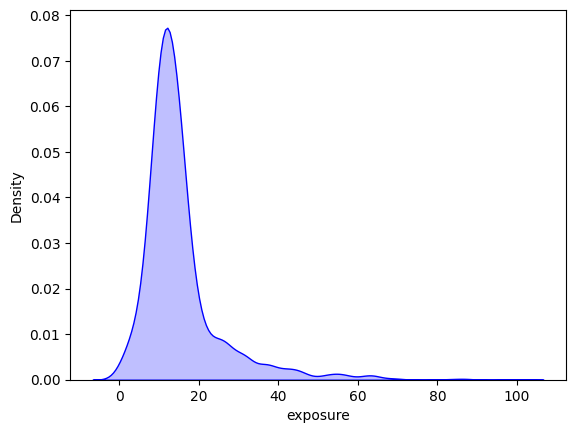

In [5]:
sns.distplot(
    df["exposure"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Nuestra variable respuesta no es simétrica, tiene una asimetría positiva ya que el valor del skew 2.75

4 - ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [7]:
kurtosistest(df['exposure'])

KurtosistestResult(statistic=19.016521784124464, pvalue=1.2447206461942722e-80)

Nuestra variable respuesta es leptocúrtica, tiene una morfología afilada, tanto porque el valor es positivo como lo podemos ver en el gráfico

5- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [9]:
kstest(df["exposure"], 'norm')

KstestResult(statistic=0.9829459870076139, pvalue=0.0)

<Figure size 1500x4000 with 0 Axes>

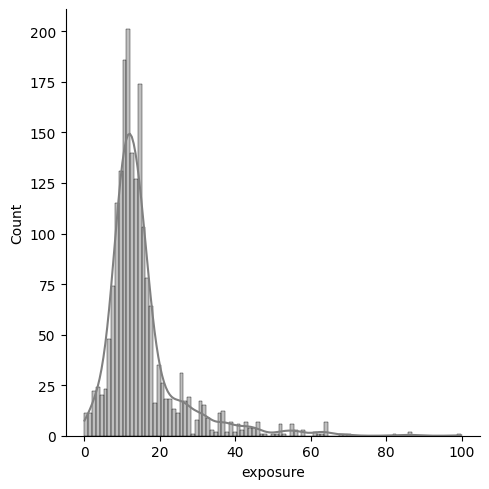

In [21]:
sns.displot(df["exposure"], kde = True, color = "grey");

<Figure size 800x400 with 0 Axes>

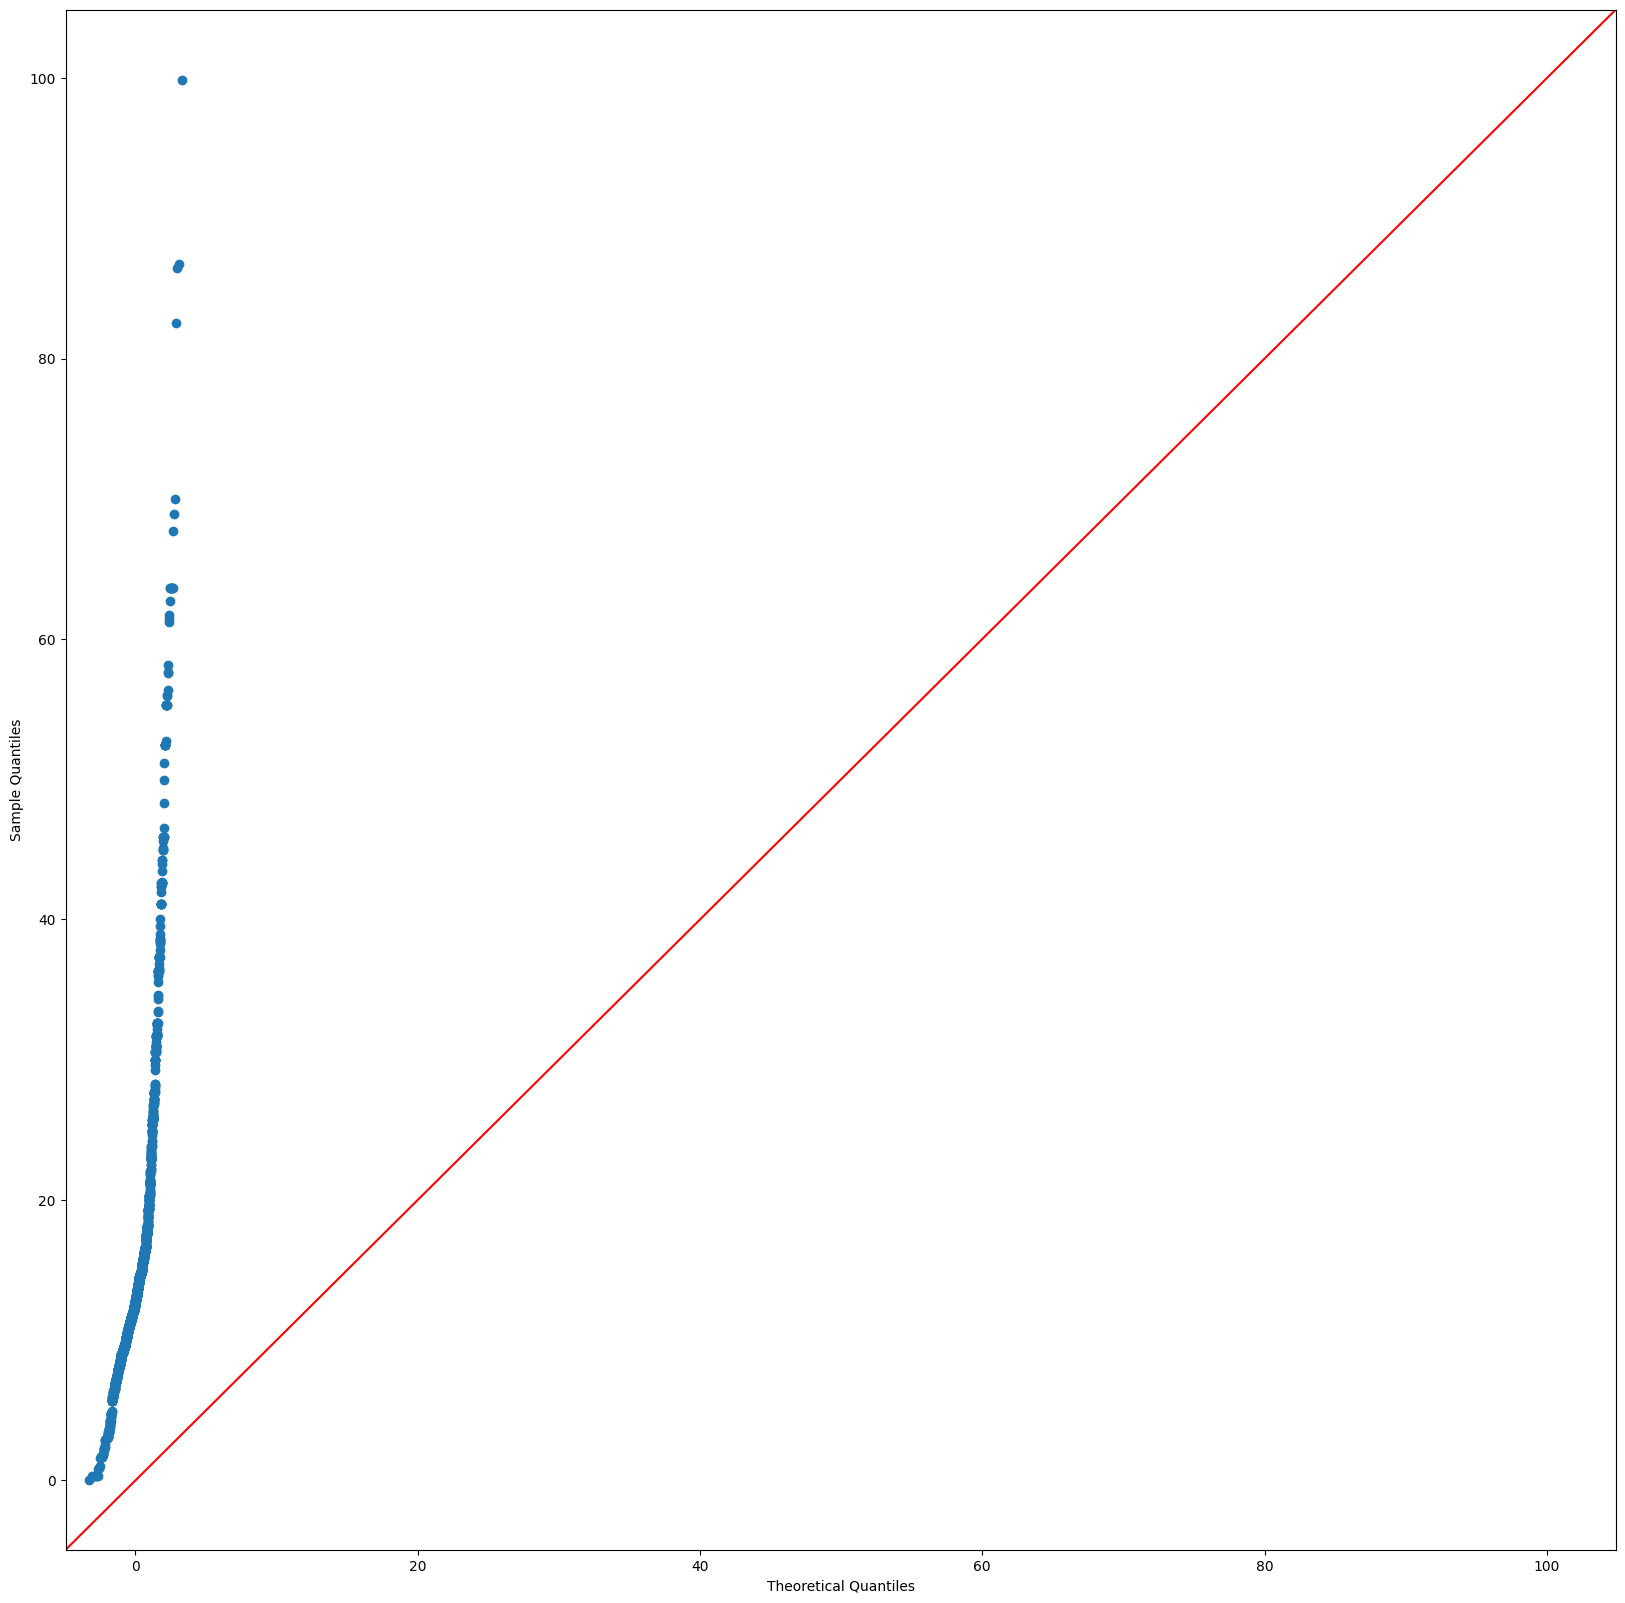

In [26]:
plt.figure(figsize =(8,4))

fig = sm.qqplot(df["exposure"], line ='45')


Nuestra variable respuesta no es normal, 